# Group By Fuction

* GroupBy holds a paramount role in efficiently organizing and summarizing complex datasets.
* Let's unravel the essence of GroupBy and explore its transformative impact on the landscape of data analysis

In [ ]:
# Import essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# Example using a CSV file
df = pd.read_csv('/content/customer_shopping_data.csv')

In [3]:
# Display basic statistics
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [4]:
# Check for missing values
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [6]:
df.shape

(99457, 10)

In [ ]:
df.info()

In [7]:
# Example of basic GroupBy using your dataset columns
grouped_data = df.groupby('category')['price'].mean()
grouped_data

category
Books                45.568621
Clothing            901.084021
Cosmetics           122.448626
Food & Beverage      15.671948
Shoes              1807.388568
Souvenir             34.894345
Technology         3156.935548
Toys                107.733185
Name: price, dtype: float64

In [8]:
# Multi-column GroupBy example using your dataset columns
multi_column_grouped = df.groupby(['gender', 'category'])['price'].sum()
multi_column_grouped

gender  category       
Female  Books                132956.40
        Clothing           18616663.12
        Cosmetics           1108432.26
        Food & Beverage      137873.26
        Shoes              10746644.02
        Souvenir             105288.48
        Technology          9425850.00
        Toys                 658094.08
Male    Books                 94020.90
        Clothing           12459021.52
        Cosmetics            740174.64
        Food & Beverage       93695.45
        Shoes               7388692.87
        Souvenir              69148.35
        Technology          6346200.00
        Toys                 428610.56
Name: price, dtype: float64

In [9]:
# Custom aggregation function example using your dataset columns
def custom_agg_function(x):
    # Your custom logic here based on the 'price' column
    result = x.mean()  # Replace with your custom aggregation logic, e.g., x.mean() or x.sum()
    return result

custom_grouped = df.groupby('category')['price'].agg(custom_agg_function)
custom_grouped

category
Books                45.568621
Clothing            901.084021
Cosmetics           122.448626
Food & Beverage      15.671948
Shoes              1807.388568
Souvenir             34.894345
Technology         3156.935548
Toys                107.733185
Name: price, dtype: float64

In [10]:
# Transform method example using your dataset columns
df['mean_price_by_category'] = df.groupby('category')['price'].transform('mean')
df['mean_price_by_category']

0         901.084021
1        1807.388568
2         901.084021
3        1807.388568
4          45.568621
            ...     
99452      34.894345
99453      15.671948
99454      15.671948
99455    3156.935548
99456      34.894345
Name: mean_price_by_category, Length: 99457, dtype: float64

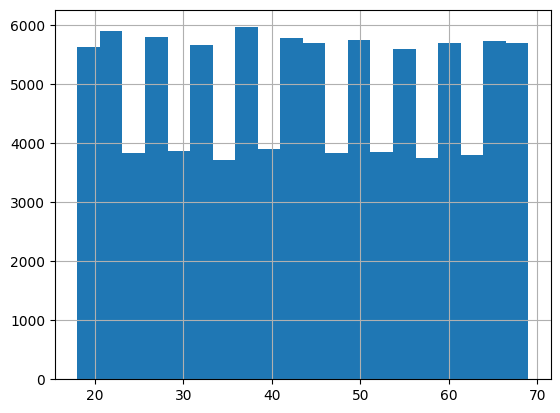

In [15]:
# Convert 'invoice_date' column to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Extract month and year from 'invoice_date'
df['invoice_month'] = df['invoice_date'].dt.month
df['invoice_year'] = df['invoice_date'].dt.year

# Analyze average quantity and total price per category per gender
category_gender_stats = df.groupby(['category', 'gender'])[['quantity', 'price']].agg({'quantity': 'mean', 'price': 'sum'})

# Calculate the total sales per shopping mall
total_sales_per_mall = df.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)

# Explore age distribution
age_distribution = df['age'].hist(bins=20)

# Identify the most common payment method
popular_payment_method = df['payment_method'].mode().values[0]

In [16]:
# 'invoice_date' is the column containing timestamps
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Group by month and sum the 'price' column
time_grouped = df.groupby(pd.Grouper(key='invoice_date', freq='M'))['price'].sum()
df['invoice_date']

0       2022-05-08
1       2021-12-12
2       2021-09-11
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]

In [17]:
time_grouped

invoice_date
2021-01-31    2576821.60
2021-02-28    2374882.12
2021-03-31    2755492.75
2021-04-30    2647497.76
2021-05-31    2678394.69
2021-06-30    2566936.55
2021-07-31    2767499.65
2021-08-31    2584867.89
2021-09-30    2477456.71
2021-10-31    2738863.73
2021-11-30    2499835.01
2021-12-31    2647756.17
2022-01-31    2700665.69
2022-02-28    2379247.27
2022-03-31    2687567.35
2022-04-30    2589770.93
2022-05-31    2679964.45
2022-06-30    2635905.48
2022-07-31    2649167.06
2022-08-31    2576463.43
2022-09-30    2596237.64
2022-10-31    2727594.65
2022-11-30    2478523.81
2022-12-31    2671718.42
2023-01-31    1796920.94
2023-02-28    1775770.11
2023-03-31     246276.50
2023-04-30     276995.69
2023-05-31     257420.54
2023-06-30     301680.27
2023-07-31     256520.43
2023-08-31     252117.95
2023-09-30     194996.06
2023-10-31     207778.80
2023-11-30     142045.14
2023-12-31     153712.67
Freq: M, Name: price, dtype: float64

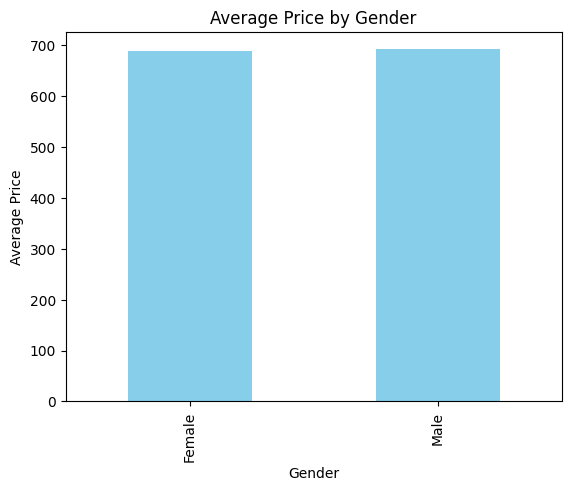

In [18]:
# Change it to the column you are interested in
grouped_data = df.groupby('gender')['price'].mean()

# Plotting
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Average Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Price')
plt.show()